<a href="https://colab.research.google.com/github/simo897d/fastbookcodealong/blob/main/FastbookBears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'bce5a17a546d4fb789488b9bc8a005b9')

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [ ]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

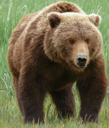

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')



In [ ]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
      desti = (path/o)
      results = search_images_bing(key, f'{o} bear')
      download_images(desti, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#413) [Path('bears/teddy/00000117.jpg'),Path('bears/teddy/00000023.jpg'),Path('bears/teddy/00000089.jpg'),Path('bears/teddy/00000002.jpg'),Path('bears/teddy/00000111.jpg'),Path('bears/teddy/00000120.jpg'),Path('bears/teddy/00000127.jpg'),Path('bears/teddy/00000096.JPG'),Path('bears/teddy/00000106.jpg'),Path('bears/teddy/00000071.jpg')...]

In [ ]:

failed = verify_images(fns)
failed

(#6) [Path('bears/teddy/00000126.jpg'),Path('bears/teddy/00000062.jpg'),Path('bears/teddy/00000035.jpg'),Path('bears/black/00000103.jpg'),Path('bears/black/00000093.jpg'),Path('bears/black/00000027.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
#hide
??verify_images

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

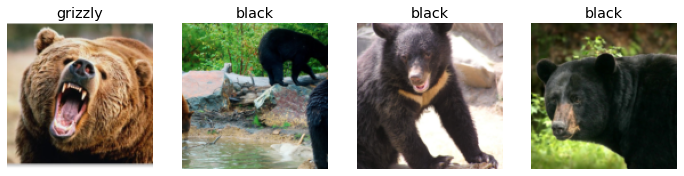

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

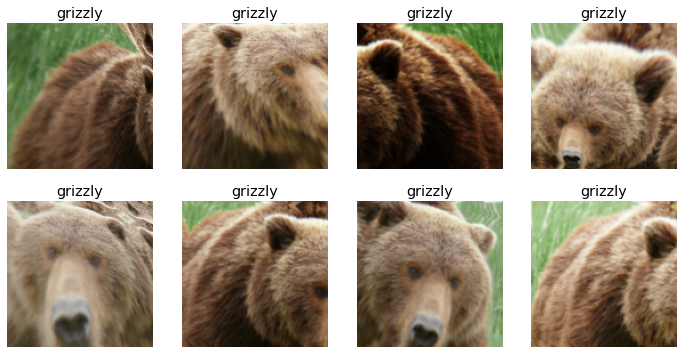

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.321022,0.296255,0.111111,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.122371,0.334079,0.185185,00:16
1,0.083744,0.616839,0.234568,00:16
2,0.082483,0.782809,0.271605,00:15
3,0.065910,0.854522,0.308642,00:16


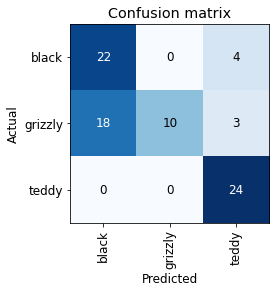

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

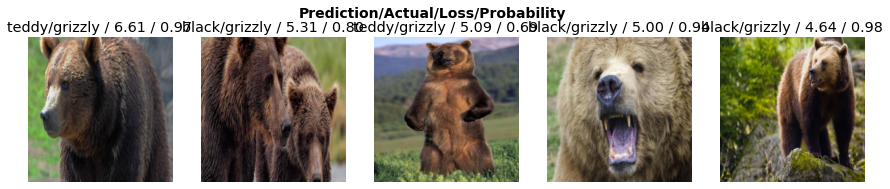

In [ ]:
interp.plot_top_losses(5, nrows=1)